<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/da09_str.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame에서 문자열 변수(컬럼) 다루기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# mpg 데이터셋

In [3]:
mpg = sns.load_dataset('mpg')

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


* mpg 데이터프레임에 company 이름의 파생변수(컬럼) 추가
* company 컬럼의 값은 name 컬럼의 첫번째 단어를 저장.

In [6]:
# mpg['company'] = mpg['name'].str.split().str[0]
mpg['company'] = [name.split()[0] for name in mpg['name']]

In [7]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford


In [8]:
mpg['company'] = mpg.name.str.split().str[0]
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,company
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [9]:
companies = mpg.company.unique()
companies

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [10]:
companies.sort()
companies

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
       'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat',
       'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes',
       'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel',
       'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
       'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo',
       'vw'], dtype=object)

In [11]:
companies.size

37

comapny 열 내 데이터 이름의 오타 수정

In [12]:
mpg['company'].replace('toyouta', 'toyota', inplace=True)
mpg['company'].replace('chevroelt', 'chevrolet', inplace=True)
mpg['company'].replace('vokswagen', 'volkswagen', inplace=True)

# mpg.replace({'company' : 'vokswage'}, 'volkswagen', inplace=True)

/tmp/ipython-input-12-95872423.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mpg['company'].replace('toyouta', 'toyota', inplace=True)
/tmp/ipython-input-12-95872423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [13]:
# 데이터 정제
mpg.loc[mpg.company == 'chevroelt', 'company'] = 'chevrolet'
mpg.loc[mpg.company == 'maxda', 'company'] = 'mazda'
mpg.loc[mpg.company == 'mercedes', 'company'] = 'mercedes-benz'
mpg.loc[mpg.company == 'toyouta', 'company'] = 'toyota'
mpg.loc[mpg.company == 'vokswagen', 'company'] = 'volkswagen'

In [14]:
mpg.company.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'honda',
       'subaru', 'capri', 'vw', 'mercedes-benz', 'cadillac', 'triumph',
       'nissan'], dtype=object)

In [15]:
companies = mpg.company.unique()
companies.sort()
companies

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet',
       'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi',
       'honda', 'mazda', 'mercedes-benz', 'mercury', 'nissan',
       'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault',
       'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo', 'vw'],
      dtype=object)

# movies 데이터셋

In [16]:
movies_file = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/movielens/movies.dat'

In [17]:
# movies.dat 파일은 값들이 '::' 로 구분된 csv 파일.
movies = pd.read_csv(movies_file, sep='::',                     # 구분자
                     names=['movie_id', 'title', 'genres'],     # 컬럼 이름
                     engine='python')                           # sep='::' 때문에 발생하는 경고(warning)를 삭제하기 위함.

In [18]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


* 장르 분석
    * 장르가 Animation인 영화는 몇 개인가?
    * 가장 많이 등장하는 장르는 무엇인가?
* 개봉 연도 분석
    * 연도별 개봉 영화 숫자

In [21]:
movies.title.unique().size

3883

## 장르가 Animation인 영화

In [22]:
animations = movies[movies.genres.str.contains('Animation')]

In [23]:
animations.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's


In [24]:
animations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 3875
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  105 non-null    int64 
 1   title     105 non-null    object
 2   genres    105 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


In [25]:
animations.size     # 행(row)의 개수 x 열(column)의 개수

315

In [26]:
len(animations)

105

## 장르가 Drama인 영화

In [27]:
dramas = movies[movies.genres == 'Drama']

In [28]:
dramas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 13 to 3881
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  843 non-null    int64 
 1   title     843 non-null    object
 2   genres    843 non-null    object
dtypes: int64(1), object(2)
memory usage: 26.3+ KB


In [29]:
len(dramas)

843

In [30]:
dramas2 = movies[movies.genres.str.contains('Drama')]
dramas2

,movie_id,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Drama|Thriller
16,17,Sense and Sensibility (1995),Drama|Romance
...,...,...,...
3876,3946,Get Carter (2000),Action|Drama|Thriller
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [31]:
len(dramas2)

1603

## 장르가 로맨틱 코메디(Romace & Comedy)인 영화

In [32]:
movies.tail()
movies[movies.genres == 'Comedy|Romance']

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
67,68,French Twist (Gazon maudit) (1995),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


In [33]:
romantic_comedies = movies[movies.genres.str.contains('Romance') & movies.genres.str.contains('Comedy')]
romantic_comedies.head()

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance


In [34]:
len(romantic_comedies)

204

##  가장 많이 등장하는 영화 장르 10개

In [35]:
movies.genres.value_counts().head(10)

,count
genres,
Drama,843
Comedy,521
Horror,178
Comedy|Drama,162
Comedy|Romance,142
Drama|Romance,134
Documentary,116
Thriller,101
Action,65


In [36]:
vin = []
top10 = movies.genres.value_counts().head(10)
type(top10)

for i in top10.index:
    vin.append(i)

vin

['Drama',
 'Comedy',
 'Horror',
 'Comedy|Drama',
 'Comedy|Romance',
 'Drama|Romance',
 'Documentary',
 'Thriller',
 'Action',
 'Drama|Thriller']

In [37]:
genres = []     # 장르들을 저장하기 위한 빈 리스트
for x in movies.genres:
    genres.extend(x.split(sep='|'))

In [38]:
genres_series = pd.Series(genres)   # list --> pd.Series로 타입 변환
genre_count = genres_series.value_counts()
genre_count

,count
Drama,1603
Comedy,1200
Action,503
Thriller,492
Romance,471
Horror,343
Adventure,283
Sci-Fi,276
Children's,251
Crime,211


In [39]:
top10_genre = genre_count.head(10)
top10_genre

,count
Drama,1603
Comedy,1200
Action,503
Thriller,492
Romance,471
Horror,343
Adventure,283
Sci-Fi,276
Children's,251
Crime,211


<Axes: xlabel='count', ylabel='None'>

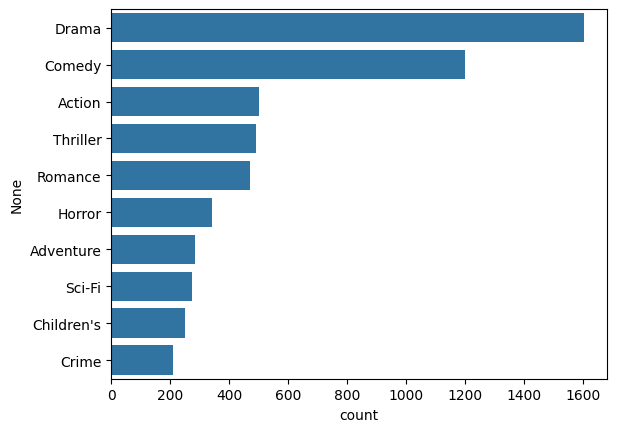

In [40]:
# sns.barplot(data=top10_genre)   # 세로 막대 그래프
sns.barplot(x=top10_genre, y=top10_genre.index)

등장하는 영화 장르 하위 10개

In [41]:
low10_genre = genre_count.tail(10)
low10_genre

,count
Children's,251
Crime,211
War,143
Documentary,127
Musical,114
Mystery,106
Animation,105
Fantasy,68
Western,68
Film-Noir,44


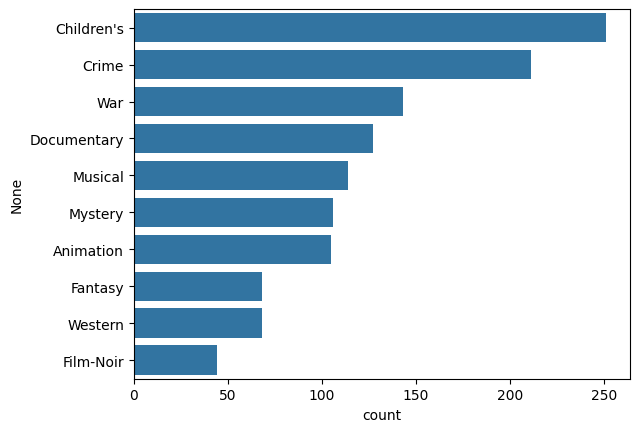

In [42]:
sns.barplot(x=low10_genre, y=low10_genre.index)
plt.show()

## 영화 개봉 연도 분석
    * 영화 제목(title)에서 영화 개봉 연도를 찾아서 파생 변수(year) 생성
    * 연도별 개봉 영화 수
    * 그래프 시각화

In [43]:
movies['year'] = movies.title.str.split().str[-1].str[1:5]

In [44]:
movies['year'].value_counts()

,count
year,
1996,345
1995,342
1998,337
1997,315
1999,283
...,...
1928,3
1920,2
1922,2


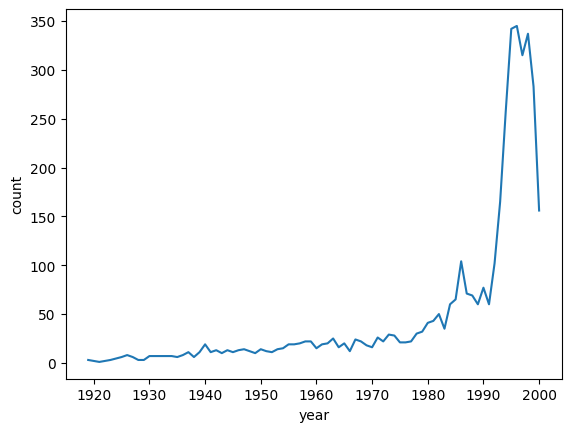

In [62]:
sns.lineplot(movies['year'].value_counts())
plt.show()

<Axes: xlabel='year', ylabel='count'>

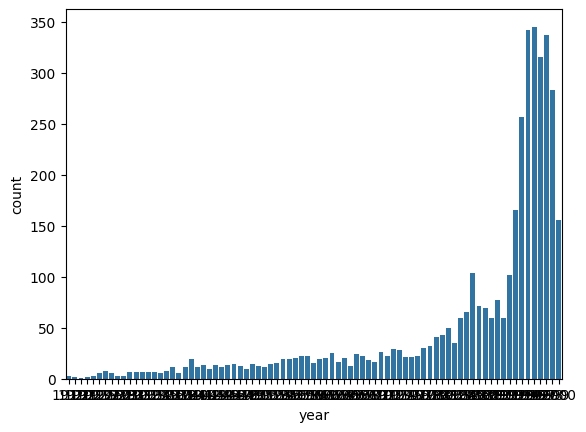

In [63]:
sns.barplot(movies['year'].value_counts())

In [47]:
movies['year'] = movies.title.str[-5:-1].astype(int)

In [48]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [49]:
movies.tail()

,movie_id,title,genres,year
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000
3882,3952,"Contender, The (2000)",Drama|Thriller,2000


In [50]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
 3   year      3883 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 121.5+ KB


In [51]:
year_count = movies.year.value_counts()

In [52]:
year_count

,count
year,
1996,345
1995,342
1998,337
1997,315
1999,283
...,...
1928,3
1919,3
1922,2


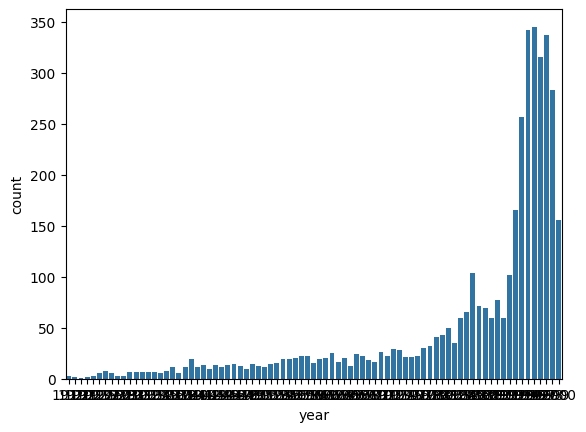

In [53]:
sns.barplot(data=year_count)
plt.show()

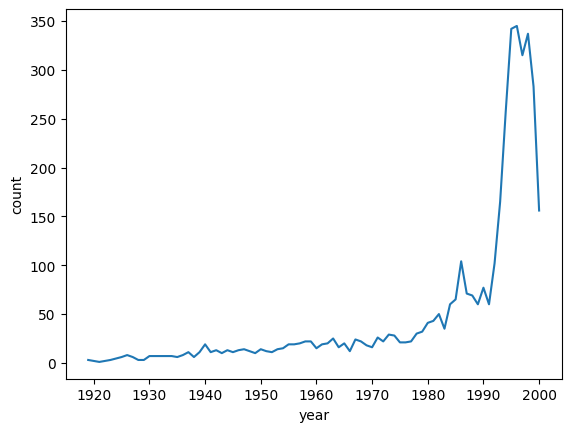

In [54]:
sns.lineplot(data=year_count)
plt.show()